In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

# Задание 2.1
### Методом простой итерации найти корни вещественного уравнения 
### $P(x) = x^5 + 2.5x^4 + 2.1x^3 + 1.9x^2 + 1.1x - 0.1$
### с точностью $10^{-8}$

In [2]:
#Функция
def P(x):
    return x**5+2.5*(x**4)+2.1*(x**3)+1.9*(x**2)+1.1*x-0.1

#Производная функции
def dP(x):
    return 5*(x**4)+10*(x**3)+6.3*(x**2)+3.8*x+1.1

#Точность
eps = 10**(-8)

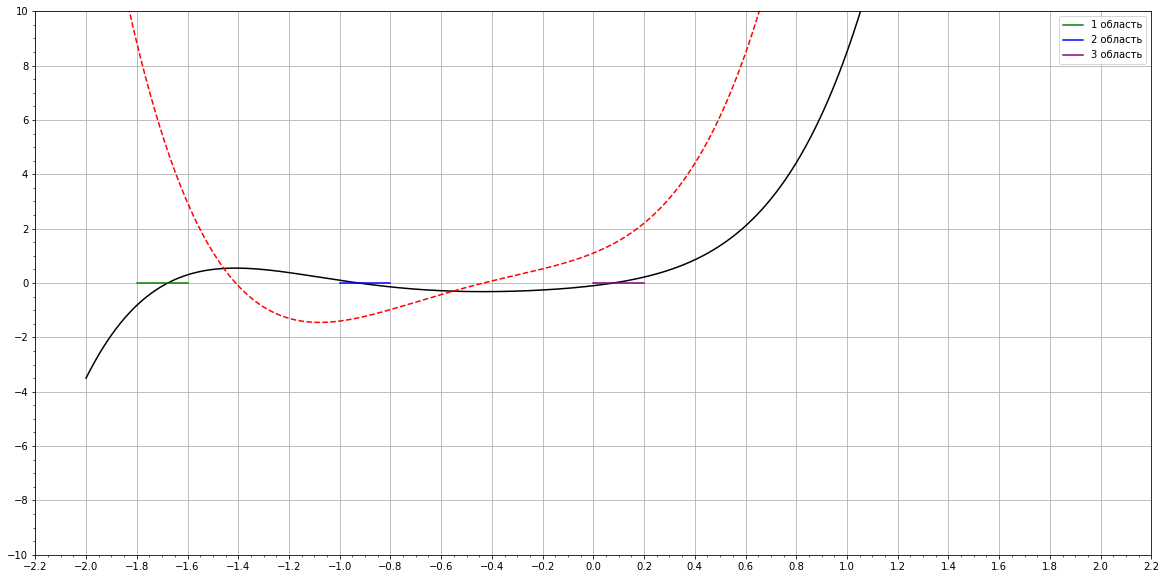

In [16]:
fig, axs = plt.subplots(1, 1, figsize = (20, 10))

#Интервал (ищется методом проб и ошибок)
x_interval = np.linspace(-2, 2, 4000)

#График функции
axs.plot(x_interval, P(x_interval), color = 'black')

#График производной
axs.plot(x_interval, dP(x_interval), color = 'red', ls = 'dashed')

#Добавим для наглядности сетку
axs.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
axs.yaxis.set_major_locator(ticker.MultipleLocator(2))
axs.minorticks_on()
axs.grid(True)

#Ограничим ось OY
axs.set_ylim([-10,10])

#На основе графика выделим 3 области локализации
axs.plot([-1.8, -1.6], [0, 0], color = 'green', label = "1 область")
axs.plot([-1.0, -0.8], [0, 0], color = 'blue', label = "2 область")
axs.plot([0.0, 0.2], [0, 0], color = 'purple', label = "3 область")
axs.legend()

In [17]:
#Значения производных по графику(примерно)
PM = [8.5, -1, 2.2] #макс
Pm = [3, -1.5, 1] #мин

#Создаем массивы из 3 элементов
a = [0, 0, 0]
q = [0, 0, 0]

#И заполняем их значениями q и a
for i in range(3):
    a[i] = (2/(Pm[i] + PM[i]))
    q[i] = abs((Pm[i] - PM[i])/(Pm[i] + PM[i]))

#Выводим значения А и Q
print("A:",a)
print("Q:",q)

A: [0.17391304347826086, -0.8, 0.625]
Q: [0.4782608695652174, 0.2, 0.37500000000000006]


In [19]:
#Начем считать корни
#В качестве начального приближения берём середины отрезков локализации
x = [-1.7, -0.9, 0.1]

#переменная для хранения кол-ва итераций
it = [0, 0, 0]

#функция, считающая корень
def iteration(x, a, eps):
    it = 0
    buffer_x = x - a * P(x)
    while abs(buffer_x - x) > eps :
        x = buffer_x
        buffer_x = x - a * P(x)
        it += 1
    return (it,x)

#считаем корни
for i in range (3):
    it[i], x[i] = iteration(x[i], a[i], eps)

#Выводим результаты
print("iteration:",it)
print("x:",x)

iteration: [8, 4, 6]
x: [-1.6777879817065973, -0.9256377067295699, 0.079073560223913]


# Задание 2.2
### Решение нелинейного уравнения 
### $f(x) = 2\cos{x^2} + e^{\sin{x}} - 2$
### на отрезке [0, 4] методом Ньютона и упрощённым методом Ньютона

In [4]:
#функция
def f2(x):
    return 2*np.cos(x**2)+np.exp(np.sin(x))-2

#производная
def df2(x):
    return -4*x*np.sin(x**2)+np.cos(x)*np.exp(np.sin(x))

#точность
eps = 10**(-12)

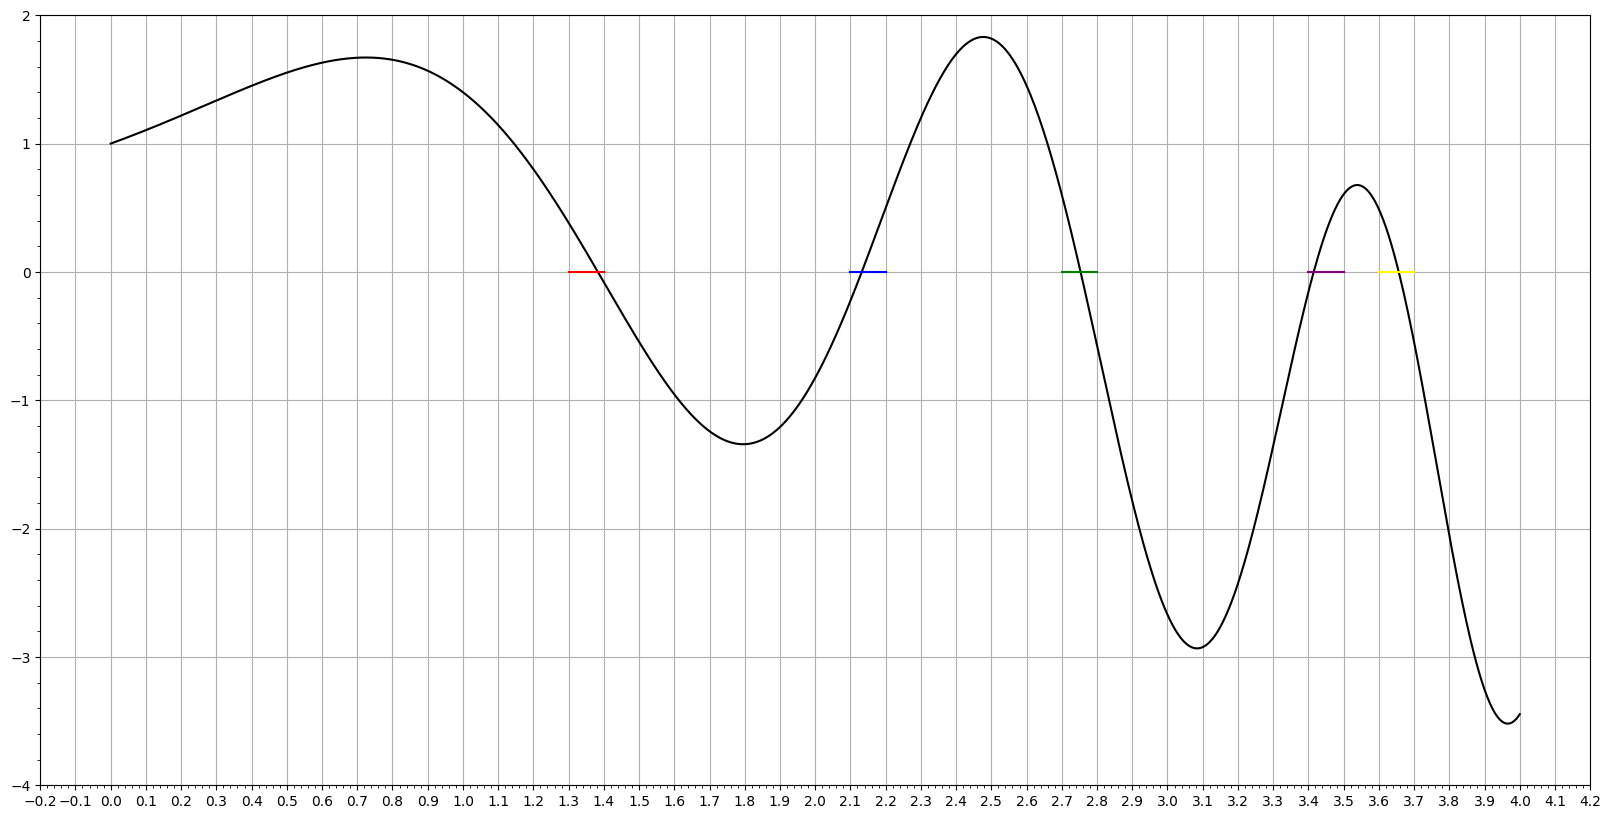

In [5]:
#Интервал
x_interval2 = np.linspace(0, 4, 1000)

fig, axs = plt.subplots(1, 1, figsize = (20, 10))

#График функции
axs.plot(x_interval2, f2(x_interval2), color = 'black')
axs.set_ylim([-4, 2])
axs.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axs.minorticks_on()
axs.grid(True)

#выделим области локализации 5 корней
axs.plot([1.3, 1.4], [0, 0], color = 'red')
axs.plot([2.1, 2.2], [0, 0], color = 'blue')
axs.plot([2.7, 2.8], [0, 0], color = 'green')
axs.plot([3.4, 3.5], [0, 0], color = 'purple')
axs.plot([3.6, 3.7], [0, 0], color = 'yellow')

In [6]:
#По графику выделим 5 отрезков локализации
local = np.array([[1.3, 1.4],[2.1, 2.2],[2.7, 2.8],[3.4, 3.5],[3.6, 3.7]])

In [8]:
#метод Ньютона
def newtone(local, eps):
    it = 0
    x = (local[0] + local[1])/2
    buffer_x = x - f2(x)/df2(x)
    while (abs(x - buffer_x) > eps):
        x = buffer_x
        buffer_x = x - f2(x)/df2(x)
        it += 1
    return (it, x)

#Упрощённый метод Ньютона
def simNewtone(local, eps):
    it = 0
    x0 = (local[0] + local[1])/2
    x = (local[0] + local[1])/2
    buffer_x = x - f2(x)/df2(x0)
    while (abs(x - buffer_x) > eps):
        x = buffer_x
        buffer_x = x - f2(x)/df2(x0)
        it += 1
    return (it, x)
    
for i in range(5):
    print(i+1,") Newtone:", newtone(local[i], eps))
    print("    SimNewtone:", simNewtone(local[i], eps))
    print("\n")

1 ) Newtone: (3, 1.3830774718831313)
    SimNewtone: (6, 1.383077471882998)


2 ) Newtone: (3, 2.13208924583062)
    SimNewtone: (6, 2.1320892458309144)


3 ) Newtone: (3, 2.753309397112646)
    SimNewtone: (5, 2.753309397112655)


4 ) Newtone: (4, 3.414991650263087)
    SimNewtone: (19, 3.4149916502623903)


5 ) Newtone: (3, 3.6564396851559113)
    SimNewtone: (8, 3.656439685155802)




In [9]:
#модифицированный Ньютон
def newtoneMod(local, eps):
    it = 0
    r = []
    x = (local[0] + local[1])/2
    buffer_x = x - f2(x)/df2(x)
    while (abs(x - buffer_x) > eps) and (it <= 10) :
        r.append(abs(f2(x)))
        x = buffer_x
        buffer_x = x - f2(x)/df2(x)
        it += 1
    return (r, x, it)

#модифицированный упрощенный Ньютон
def simNewtoneMod(local, eps):
    it = 0
    r = []
    x0 = (local[0] + local[1])/2
    x = (local[0] + local[1])/2
    buffer_x = x - f2(x)/df2(x0)
    while (abs(x - buffer_x) > eps) and (it <= 10) :
        r.append(abs(f2(x)))
        x = buffer_x
        buffer_x = x - f2(x)/df2(x0)
        it += 1
    return (r, x, it)

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_10968\2161364965.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ro" (-> color='r'). The keyword argument will take precedence.
  axs[(i % 3)][(i % 2)].plot(np.arange(newtoneMod(local[i], 10**(-12))[2]) + 1,newtoneMod(local[i], 10**(-12))[0],'--ro',
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_10968\2161364965.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bx" (-> color='b'). The keyword argument will take precedence.
  axs[(i % 3)][(i % 2)].plot(np.arange(simNewtoneMod(local[i], 10**(-12))[2]) + 1, simNewtoneMod(local[i], 10**(-12))[0],


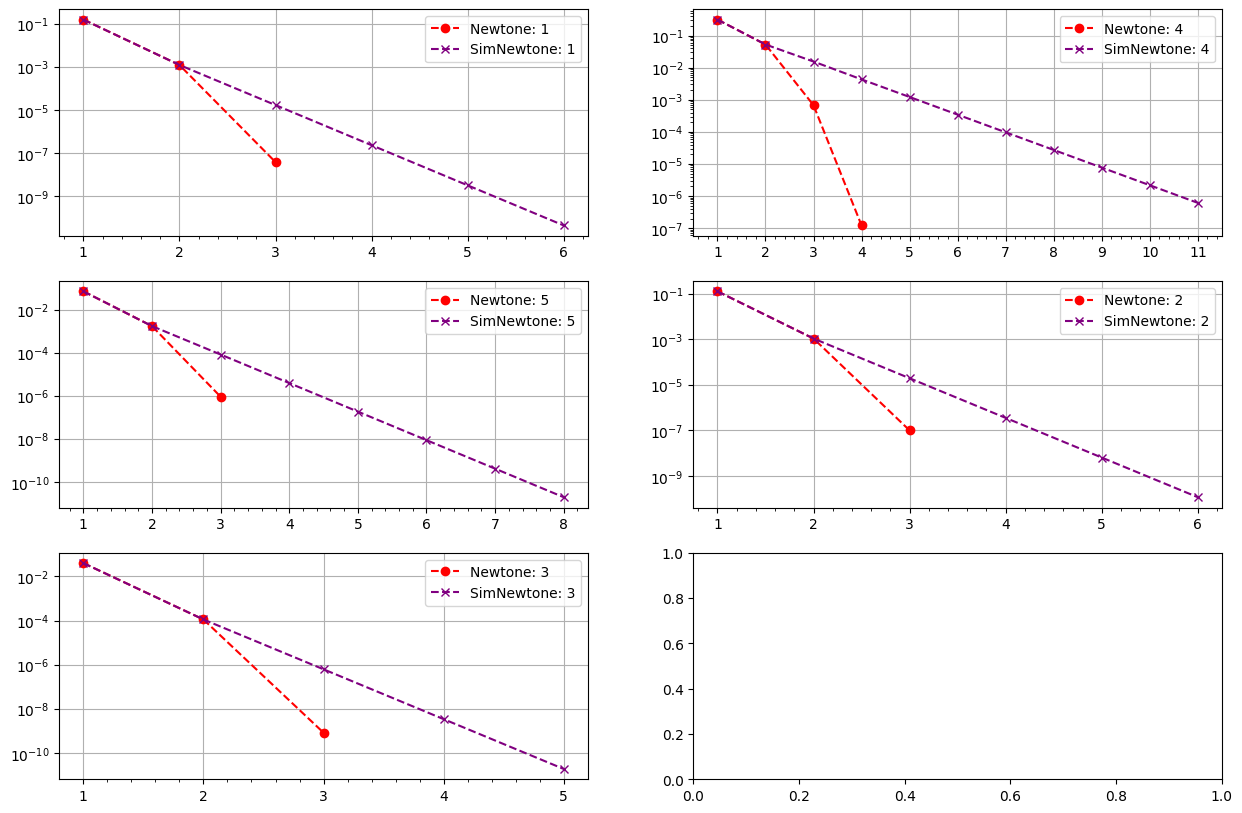

In [10]:
fig, axs = plt.subplots(3, 2, figsize = (15, 10))

#График функции
#Сетка для наглядности
#И переведем шкаолу в логарифмическую
for i in range(5):
    axs[(i % 3)][(i % 2)].plot(np.arange(newtoneMod(local[i], 10**(-12))[2]) + 1,newtoneMod(local[i], 10**(-12))[0],'--ro',
                               color = 'red', label = f'Newtone: {i+1}')
    axs[(i % 3)][(i % 2)].plot(np.arange(simNewtoneMod(local[i], 10**(-12))[2]) + 1, simNewtoneMod(local[i], 10**(-12))[0],
                               '--bx', color = 'purple', label = f'SimNewtone: {i+1}')
    axs[(i % 3)][(i % 2)].xaxis.set_major_locator(ticker.MultipleLocator(1))
    axs[(i % 3)][(i % 2)].minorticks_on()
    axs[(i % 3)][(i % 2)].grid(True)
    axs[(i % 3)][(i % 2)].legend()
    axs[(i % 3)][(i % 2)].set_yscale('log')

# Задание 2.3
### Найти корни уравнения
### $P(x) = \sqrt{3} + \frac{1}{9}\cos{x}(\pi\sqrt(3)-5\pi x - 18 - 6\sqrt{3}x - 15x^2 - \frac{5}{12}\pi^2)$
### и определить их кратность

In [7]:
# функция
def f(x):
    return np.sqrt(3)+(1/9)*np.cos(x)*(np.pi*np.sqrt(3)-5*np.pi*x-18-6*np.sqrt(3)*x-15*(x**2)-(5/12)*(np.pi**2))

#Производная нашей функции
def df(x):
    return np.cos(x)*((-10/3)*x-(5/9)*np.pi-(2/3)*np.sqrt(3))-np.sin(x)*((-5/3)*(x**2)-(5/9)*np.pi*x-(2/3)*np.sqrt(3)*x-2-
                                                                         (5/108)*(np.pi**2)+np.sqrt(3)*(1/9)*np.pi)

#вторая производная производной нашей функции
def ddf(x):
    return (2/9)*np.sin(x)*(30*x+6*np.sqrt(3)+5*np.pi)+(1/108)*np.cos(x)*(108*(x**2)+72*np.sqrt(3)*x+60*np.pi*x-
                                                                          144-12*np.sqrt(3)*np.pi+5*(np.pi**2))
def dddf(x):
    return (1/3)*np.cos(x)*(30*x+6*np.sqrt(3)+5*np.pi)-(1/108)*np.sin(x)*(108*(x**2)+72*np.sqrt(3)*x+60*np.pi*x-
                                                                          12*np.sqrt(3)*np.pi+5*(np.pi**2)+216)+10*np.sin(x)

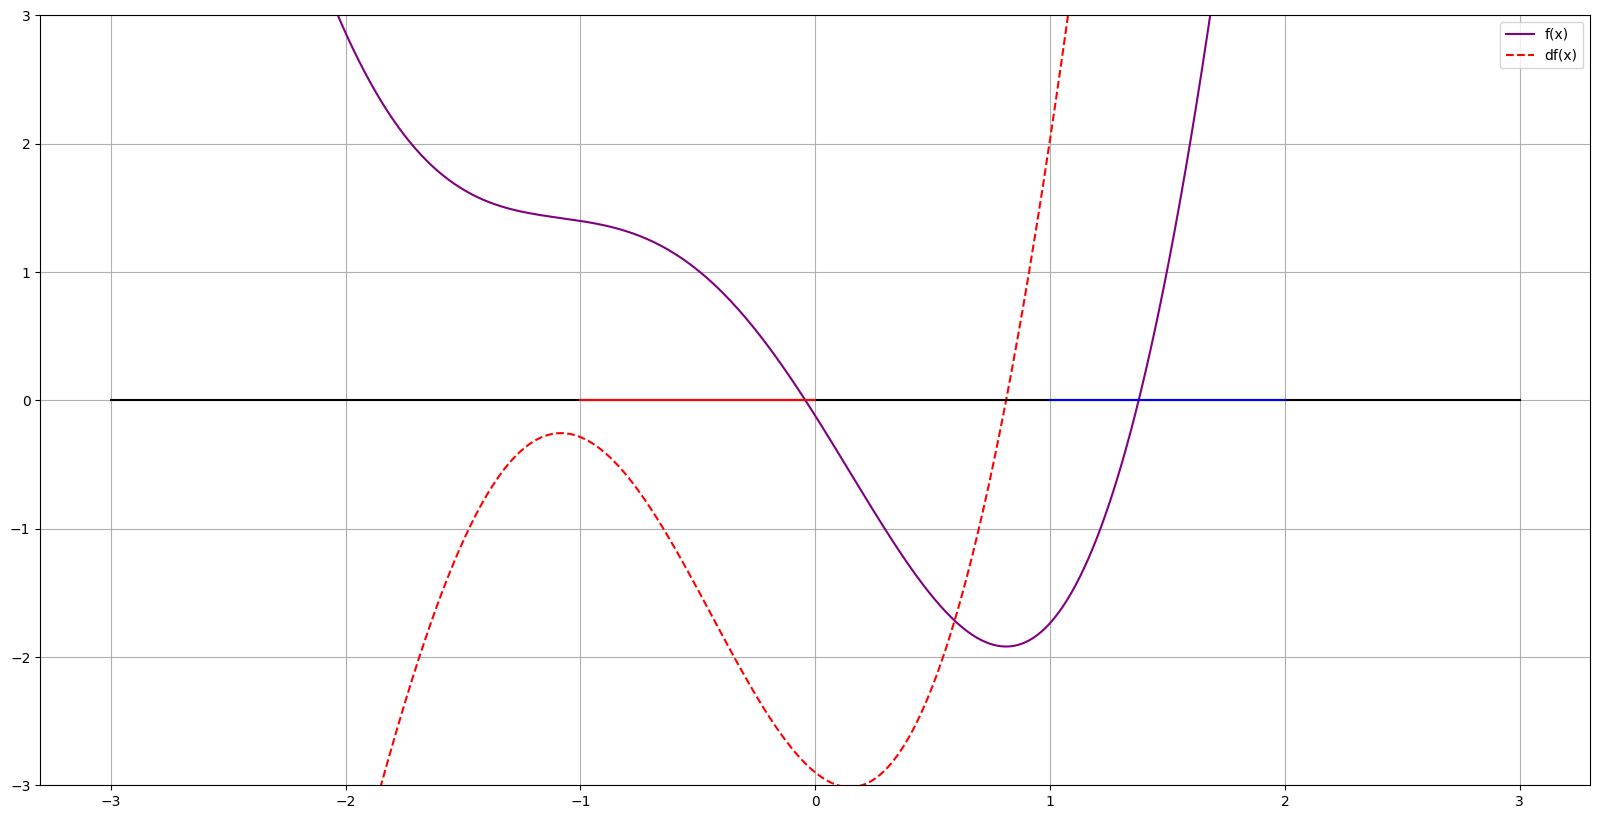

In [5]:
x_interval2 = np.linspace(-3, 3, 1000)

fig, axs = plt.subplots(1, 1, figsize = (20, 10))

#График функции
axs.plot(x_interval2, f(x_interval2), color = 'purple', label = 'f(x)')
axs.plot(x_interval2, df(x_interval2), color = 'red', ls = 'dashed', label = 'df(x)')
#axs.plot(x_interval2, ddf(x_interval2), color = 'green', ls = 'dotted', label = 'ddf(x)')
#axs.plot(x_interval2, dddf(x_interval2), color = 'blue', ls = 'dotted', label = 'dddf(x)')
axs.plot([-3, 3], [0, 0], color = 'black')
axs.plot([-1, 0], [0, 0], color = 'red')
axs.plot([1, 2], [0, 0], color = 'blue')
axs.legend()
axs.set_ylim([-3, 3])
axs.grid(True)

In [5]:
#выделеим два отрезка логализации
local = np.array([[-1, 0],[1, 2]])

In [2]:
eps = 10**(-10)
def newtoneKr (local, k):
    it = 0
    x = (local[0]+local[1])/2
    x1 = x - (k*f(x))/df(x)
    while np.abs(x1-x) >= eps:
        x = x1
        x1 = x - (k*f(x))/df(x)
        it += 1
    return (x1, it)

In [8]:
for i in range(2):
    print("newtoneKr: ", newtoneKr(local[i], 1))

newtoneKr:  (-0.041959578875460514, 4)
newtoneKr:  (1.3773179331259684, 4)
